# Redes Neurais Profundas e Deep Learning com Keras

## Indice

1. [*Dataset* utilizado](#usedDataset)
2. [Exemplos de elementos do *dataset*](#exampleData)
3. [Um primeiro modelo](#firstModel)
    1. [Entrada](#firstInput)
    2. [Processamento](#firstProcessing)
    3. [Saída](#firstOutput)
4. [Normalizando a entrada](#normalizing)
5. [Melhorando o treinamento](#improving)
    1. [Métricas](#improvingMetrics)
    2. [Épocas](#improvingEpochs)
    3. [Validação](#improvingValidation)
6. [Previsões](#predictions)
7. [Avaliando o modelo](#evaluating)
8. [Desenhando o histórico](#drawingHistory)
9. [Dropout](#dropout)
10. [Salvando o modelo](#saving)


Neste Notebook veremos como definir a estrutura de uma Rede Neural Profunda, treiná-la com *deep learning* e utilizá-la para realizar classificações em um problema complexo.


## *Dataset* utilizado <a name="usedDataset">

Para essa demonstração, foi utilizado o *dataset* FASHIONMIST, obtível pelo próprio Keras. Os dados consistem de imagens 28x28 de peças de roupas, e suas classificações em 10 categorias diferentes (Camiseta, calça, vestido, etc...).

In [1]:
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
dataset = keras.datasets.fashion_mnist.load_data()

In [3]:
# Classes do modelo, como apresentadas na documentação do Keras
classes = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [4]:
(imgs_train, classes_train), (imgs_test, classes_test) = dataset

In [5]:
imgs_train.shape

(60000, 28, 28)

## Exemplos de elementos do *dataset* <a name="exampleData">

Aqui vemos que, como esperado, as imagens são 28x28, e temos 60000 imagens de treino para o nosso modelo.

Vamos ver abaixo alguns exemplos de dados do nosso *dataset*.

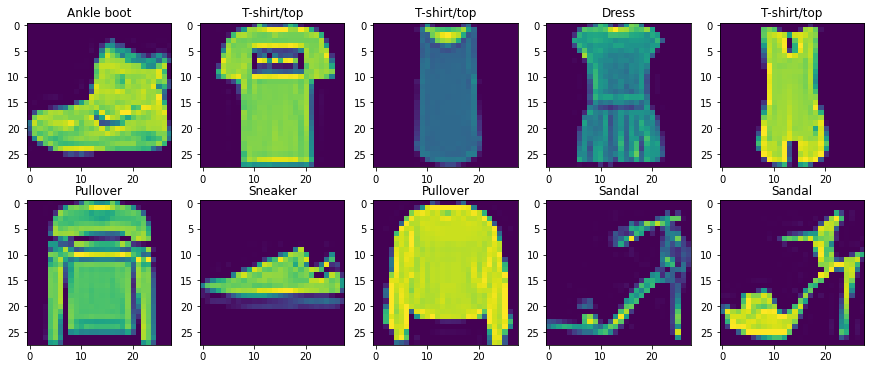

In [6]:
plt.subplots(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs_train[i])
    plt.title(classes[classes_train[i]])

## Um primeiro modelo <a name="firstModel">

Vamos então, definir a estrutura para uma rede neural no Keras. Para isso, precisamos definir as três (ou mais) camadas de nossa rede neural.

### Entrada <a name="firstInput">

A primeira camada representa a entrada da nossa rede. No caso, sabemos que seu formato será o de uma imagem (28x28), então realizaremos a operação *flatten* desse formato, a fim de transformar os dados em uma estrutura mais facilmente processada.

### Processamento <a name="firstProcessing">

Nossa primeira camada oculta de processamento. Não nos aprofundaremos muito no por quê do tipo de ativação ReLu ter sido escolhida fora a vantagem crucial de manter os valores positivos.

Fora isso, também vale comentar que é ideal que camadas de processamento tenham dimensões múltiplas de 2 (56, 128, 512, etc...), por otimizar o processamento.

O tipo de camada escolhida é *dense*, o que implica que cada *neuron* dessa camdada estará conectado com todos os *neuros* da camada anterior.

### Saída <a name="firstOutput">

A saída é composta de outra camada *dense*, mas agora deve representar nossos resultados. Nossa camada será de tamanho 10, um para cada classe do nosso modelo, e seu método de ativação será *softmax*, a fim de que o valor retornado será a classe entre as 10 a qual o modelo tem maior certeza de ser a correta.

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Input Layer
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # Processing Layer. Best if size is a multiple of 2 
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # Output Layer
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [8]:
model.fit(imgs_train, classes_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 3.7403


Uhm... nosso resultado não foi muito legal (loss ≃~ 4.0), mesmo para um primeiro tratamento, vamos analisar melhor nossas imagens de entrada.

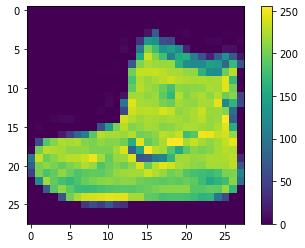

In [9]:
plt.imshow(imgs_train[0])
plt.colorbar()

## Normalizando a entrada <a name="normalizing">

Podemos ver que as imagens têm a informação do tom de cor entre os valores 0 e 255, mas nossa rede neural, por padrão, espera valores de ponto flutuante entre 0 e 1 como entrada!

Isso explica nossos resultados tão ruins.

Devemos normalizar a tonalidade para que seja corretamente processada pelo modelo, passando a ser representada por valores entre 0 e 1, como na normalização abaixo.

Com isso, o loss já abaixou bastante!

In [10]:
imgs_train = imgs_train/255.0

model.fit(imgs_train, classes_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.9936


## Melhorando o treinamento <a name="improving">

Agora já adequamos os dados, mas ainda podemos melhorar a forma como treinamos nossa rede com algumas modificações simples.

### Métricas <a name="improvingMetrics">

Uma melhora simples que podemos realizar em nosso modelo é adicionar métricas a serem medidas e apresentadas durante o treinamento. No nosso caso, também analisaremos a acurácia do modelo.

### Épocas <a name="improvingEpochs">

Cada época representa um treinamento da rede com todos os dados disponíveis. Podemos melhorar o acerto do nosso modelo treinando o modelo por várias épocas, isto é, multiplas vezes passando todos os dados de treinamento pelo modelo, de forma redundante, para tentar "garantir" sua aprendizagem.

Como você pode imaginar, treinar o modelo por épocas demais também pode levar a *overfitting*, mas isso é algo que analizaremos em breve.

No momento, vamos deixar o modelo treinar por 10 épocas, determinando esse valor em `fit()`

### Validação <a name="improvingValidation">

Outra prática comum durante o treinamento de modelos é separar os dados entre conjuntos de treino e validação. Isso traz várias vantagens, como ajudar a evitar *overfitting* e ter métricas mais similares no conjunto de validação ao o que o modelo deve apresentar com novos dados.

No nosso caso, vamos separar 20% dos dados para validação com `validation_split=0.2`

---

Agora, ao lado de cada época de treinamento, conseguimos ver a métrica que adicionamos, assim como as métricas para o conjunto de validação em cada época!

Também vamos salvar o treinamento em uma varíavel, para podermos analisar seu histórico em breve.

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Vamos adicionar a medida da acuracia durante o treinamento

training = model.fit(imgs_train, classes_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4465 - accuracy: 0.8386 - val_loss: 0.4205 - val_accuracy: 0.8410
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3643 - accuracy: 0.8665 - val_loss: 0.3489 - val_accuracy: 0.8742
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3268 - accuracy: 0.8799 - val_loss: 0.3334 - val_accuracy: 0.8807
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.8873 - val_loss: 0.3333 - val_accuracy: 0.8813
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2851 - accuracy: 0.8940 - val_loss: 0.3244 - val_accuracy: 0.8832
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2676 - accuracy: 0.9005 - val_loss: 0.3092 - val_accuracy: 0.8891
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2570 - accuracy: 0.9036 - val_loss: 0.3424 - val_accuracy:

## Previsões <a name="predictions">

Vamos ver algumas previsões do nosso modelo com o código à seguir.

Acima de cada imagem adicionaremos a classe correta dela seguida da classe prevista. Podemos ver que, realmente, na maioria dos casos as previsões já são corretas!

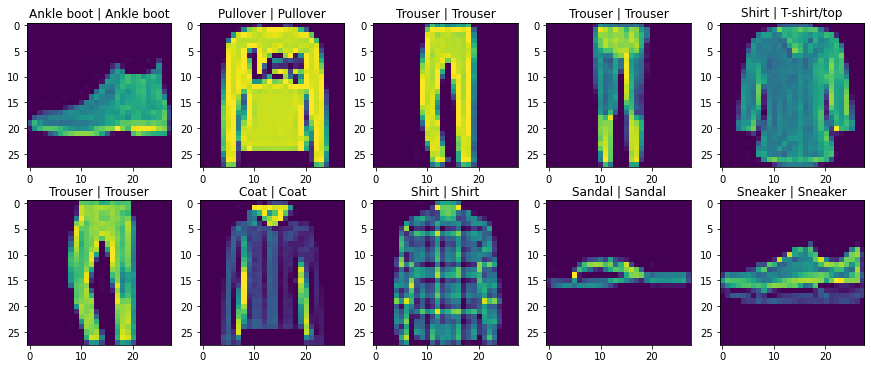

In [12]:
tests = model.predict(imgs_test)

plt.subplots(figsize=(15, 6))
for i in range(10):
    prediction = np.argmax(tests[i])
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs_test[i])
    plt.title(classes[classes_test[i]] + " | " + classes[prediction])

## Avaliando o modelo <a name="evaluating">

Podemos testar agora o modelo em nossos dados de **teste**.

In [13]:
loss, acc = model.evaluate(imgs_test, classes_test)

313/313 [==============================] - 0s 1ms/step - loss: 47.9644 - accuracy: 0.8648


Vish, os resultados foram consideravelmente piores do que no nosso treinamento!

Isso geralmente indica algum problema no nosso processo, como dados de treinamento que não representam a realidade, mas como nossos dados vêm de um *dataset* conhecido podemos assumir que este não é o problema, e sim algum nível de *overfitting*.

Bom, vamos análisar com mais carinho nosso treinamento a fim de avaliar e corrigir o problema!

---

## Desenhando o histórico <a name="drawingHistory">

In [31]:
def plot_training_history(training_history):
    plt.subplots(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.plot(training_history["accuracy"])
    plt.plot(training_history["val_accuracy"])
    plt.legend(["training", "validation"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy per Epoch")

    plt.subplot(1, 2, 2)
    plt.plot(training_history["loss"])
    plt.plot(training_history["val_loss"])
    plt.legend(["training", "validation"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss per Epoch")

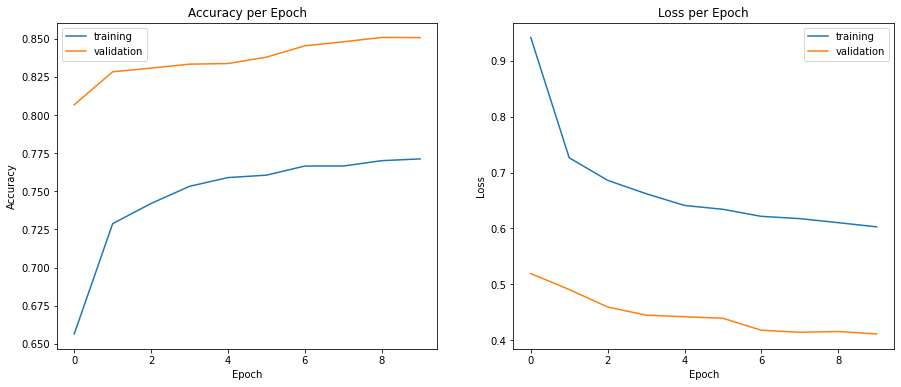

In [32]:
plot_training_history(training.history)

Podemos notar alguns problemas em torno da quinta época.

O modelo começa a ficar instável, com as métricas de validação subindo e decendo mas sem melhorar consideravelmente ao longo das épocas seguintes.

Além disso, as métricas de validação param de melhorar, enquanto as de treino continuam melhorando, o que indica possível *overfitting* aos dados de treinamento!

## *Dropout* <a name="dropout">

Vamos adicionar uma camada de dropout à nossa rede, para atenuar esses problemas.
    
De forma resumida, o dropout "desliga" uma porcentagem determinada de *neurons* aleatórios de uma camada especificada da nossa rede, a fim de evitar que nossa rede neural fique viciada nos dados de treinamento e resulte em um *overfitting*. Para mais detalhes sobre *dropout*, recomendo o recurso [A Gentle Introduction to Dropout](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/).
    
No nosso caso, vamos desativar 50% das conexões para a nossa última camada.

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [35]:
training = model.fit(imgs_train, classes_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6443 - accuracy: 0.7721 - val_loss: 0.4274 - val_accuracy: 0.8450
Epoch 2/10
1500/1500 [==============================] - 1s 995us/step - loss: 0.4816 - accuracy: 0.8277 - val_loss: 0.4005 - val_accuracy: 0.8540
Epoch 3/10
1500/1500 [==============================] - 1s 945us/step - loss: 0.4457 - accuracy: 0.8392 - val_loss: 0.3819 - val_accuracy: 0.8613
Epoch 4/10
1500/1500 [==============================] - 1s 949us/step - loss: 0.4255 - accuracy: 0.8446 - val_loss: 0.3637 - val_accuracy: 0.8662
Epoch 5/10
1500/1500 [==============================] - 1s 955us/step - loss: 0.4106 - accuracy: 0.8490 - val_loss: 0.3582 - val_accuracy: 0.8668
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3976 - accuracy: 0.8549 - val_loss: 0.3579 - val_accuracy: 0.8666
Epoch 7/10
1500/1500 [==============================] - 1s 988us/step - loss: 0.3917 - accuracy: 0.8563 - val_loss: 0.3505 - val

In [36]:
loss, acc = model.evaluate(imgs_test, classes_test)

313/313 [==============================] - 0s 991us/step - loss: 60.1965 - accuracy: 0.8508


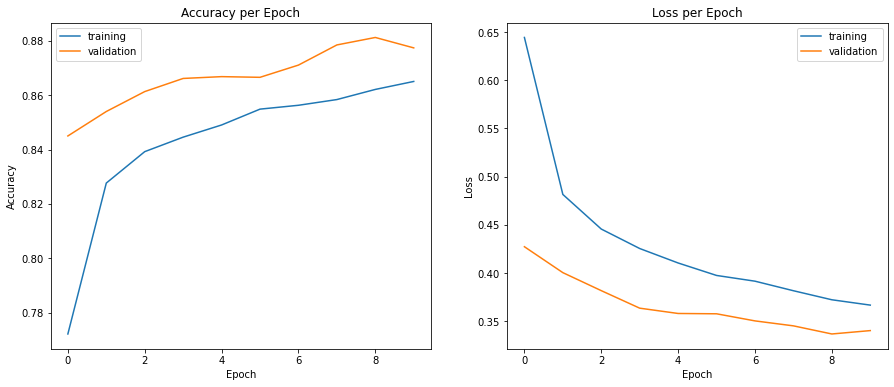

In [37]:
plot_training_history(training.history)

### Parece ter funcionado!

O modelo ainda assim parece se estabilizar quando às metricas de validação em torno da 5a época, mais notavelmente em relação à perda (*loss*), então provavelmente esse seria o modelo que gostaríamos de utilizar.

---

## Salvando o modelo <a name="saving">

Agora que temos um modelo razoável, vamos salvá-lo para não perdermos o nosso trabalho suado e podermos recuperá-lo se necessário.
    
Também já vamos aproveitar e ver os resultados do nosso modelo salvo, e podemos notar que realmente ele está bem melhor!

In [19]:
model.save("model.h5")
saved_model = keras.models.load_model("model.h5")

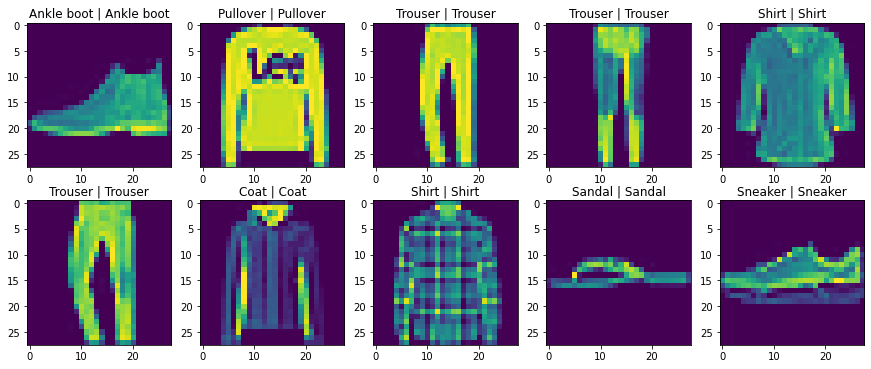

In [20]:
tests = saved_model.predict(imgs_test)

plt.subplots(figsize=(15, 6))
for i in range(10):
    prediction = np.argmax(tests[i])
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs_test[i])
    plt.title(classes[classes_test[i]] + " | " + classes[prediction])

In [21]:
loss, acc = model.evaluate(imgs_test, classes_test)

313/313 [==============================] - 0s 938us/step - loss: 52.2774 - accuracy: 0.8291
